# Projekt 3

# 1 - Skapa en ljudfil med numpy

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy.io.wavfile import write
import csv
import os
os.sys.path
from PIL import Image

### Skapa en ljudfil t.ex 1 sekund lång där du spelar ett C-accord.

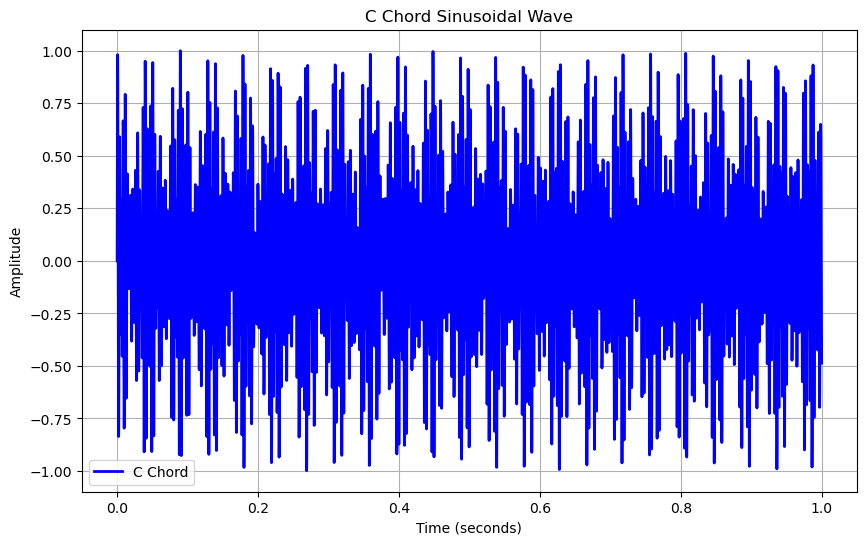

In [103]:
sample_rate = 44100
duration = 1

t = np.linspace(0, duration, duration * sample_rate)

c_note = np.sin(2 * np.pi * 281.63 * t)
e_note = np.sin(2 * np.pi * 359.63 * t)
g_note = np.sin(2 * np.pi * 382.00 * t)

# Summing sinusoidal waves to create a C chord
chord = c_note + e_note + g_note

# Normalizing the amplitude of the chord so that the maximum value is 1
chord /= np.max(np.abs(chord))

# Saving the chord to a .wav file
write('c_chord.wav', sample_rate, chord)

# Saving the time axis and chord values in two separate columns (arrays)
arrays = np.column_stack((np.array(t), np.array(chord)))

# Saving the array with "t" and "chord" to a CSV file
with open('chordInCSV.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(arrays)

# Plotting the chord with improved styling
plt.figure(figsize=(10, 6))
plt.plot(t, chord, label='C Chord', color='blue', linestyle='-', linewidth=2)
plt.title('C Chord Sinusoidal Wave')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# 2. RGB komposition

In [104]:
# Original
image = img.imread("pokeEdited.jpg")

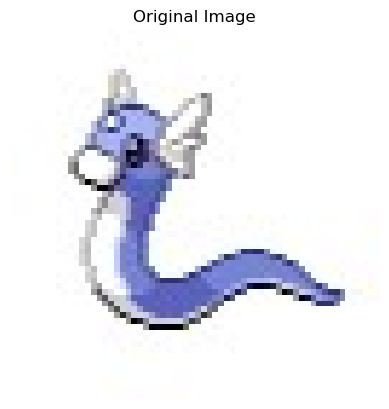

In [127]:
# Displaying the original image
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')  # Turn off axis labels for cleaner appearance
plt.show()

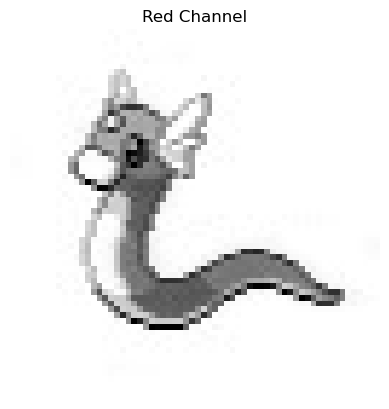

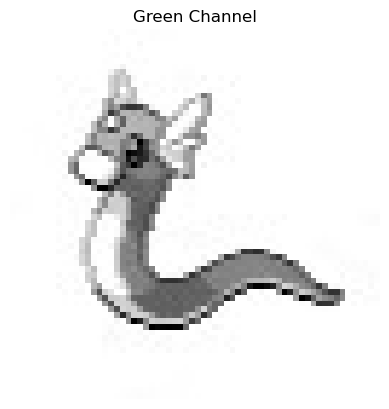

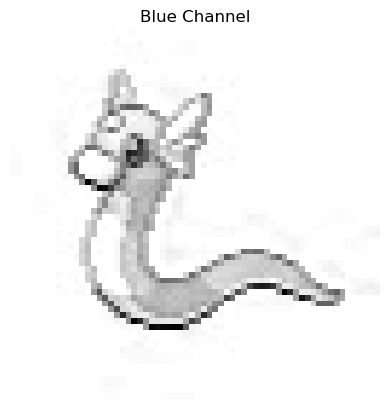

In [126]:
# Saving the individual color channels as separate images

# Red channel
plt.imshow(red_channel, cmap="gray")
plt.title("Red Channel")
plt.axis('off')  # Turn off axis labels for cleaner appearance
plt.savefig('red_channel.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

# Green channel
plt.imshow(green_channel, cmap="gray")
plt.title("Green Channel")
plt.axis('off')  # Turn off axis labels for cleaner appearance
plt.savefig('green_channel.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

# Blue channel
plt.imshow(blue_channel, cmap="gray")
plt.title("Blue Channel")
plt.axis('off')  # Turn off axis labels for cleaner appearance
plt.savefig('blue_channel.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

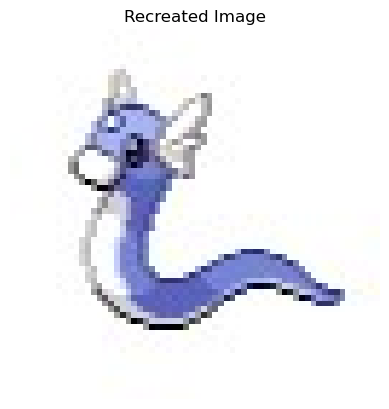

In [124]:
# Combining the separate channels to recreate the original image
recreated_img = np.stack((red_channel, green_channel, blue_channel), axis=2)

# Displaying the recreated image
plt.imshow(recreated_img)
plt.title("Recreated Image")
plt.axis('off')  # Turn off axis labels for cleaner appearance
plt.show()

In [110]:
# Här sparar vi den återskapade bilden
plt.imsave('RecreatedPoke.png', recreated_img)

# 3. Göm information i bilder

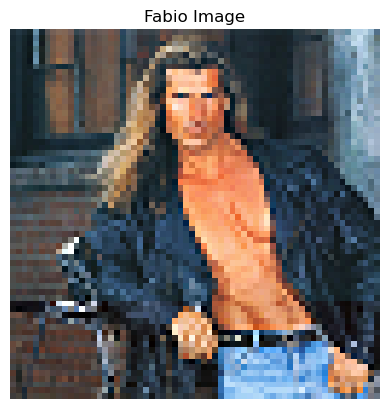

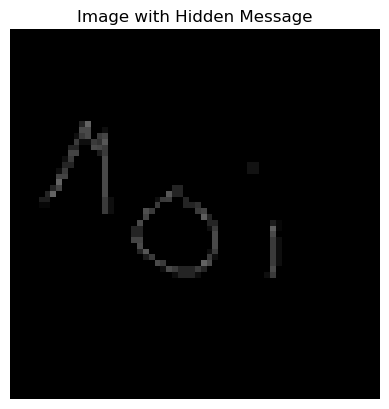

In [113]:

# Reading both 'fabio' and the image containing the hidden message
fabio = img.imread("fabio64.png")
message = img.imread("hiddenMessage2.png")

# Displaying the 'fabio' image
plt.imshow(fabio)
plt.title("Fabio Image")
plt.axis('off')  # Turn off axis labels for cleaner appearance
plt.show()

# Displaying the image containing the hidden message
plt.imshow(message)
plt.title("Image with Hidden Message")
plt.axis('off')  # Turn off axis labels for cleaner appearance
plt.show()

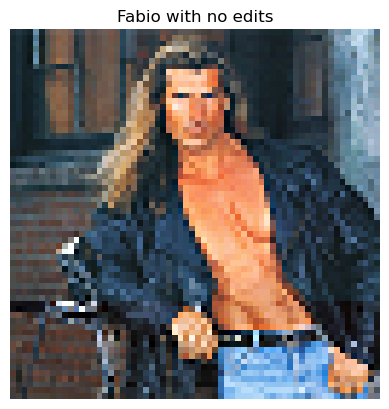

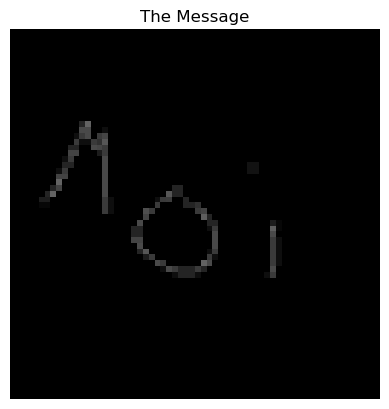

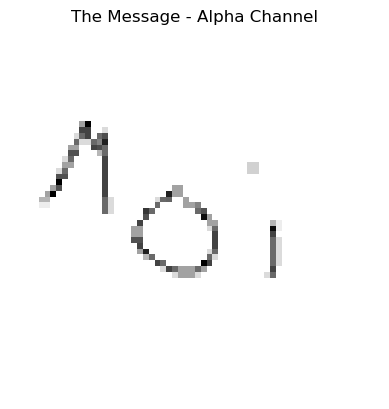

In [114]:
# Displaying the 'fabio' image
plt.imshow(fabio)
plt.title("Fabio with no edits")
plt.axis('off')  # Turn off axis labels for cleaner appearance
plt.show()

# Displaying the 'message' image
plt.imshow(message)
plt.title("The Message")
plt.axis('off')  # Turn off axis labels for cleaner appearance
plt.show()

# Displaying the alpha channel of the 'message' image
plt.imshow(message[:, :, 3], cmap='gray')  # Using 'gray' colormap for alpha channel
plt.title("The Message - Alpha Channel")
plt.axis('off')  # Turn off axis labels for cleaner appearance
plt.show()

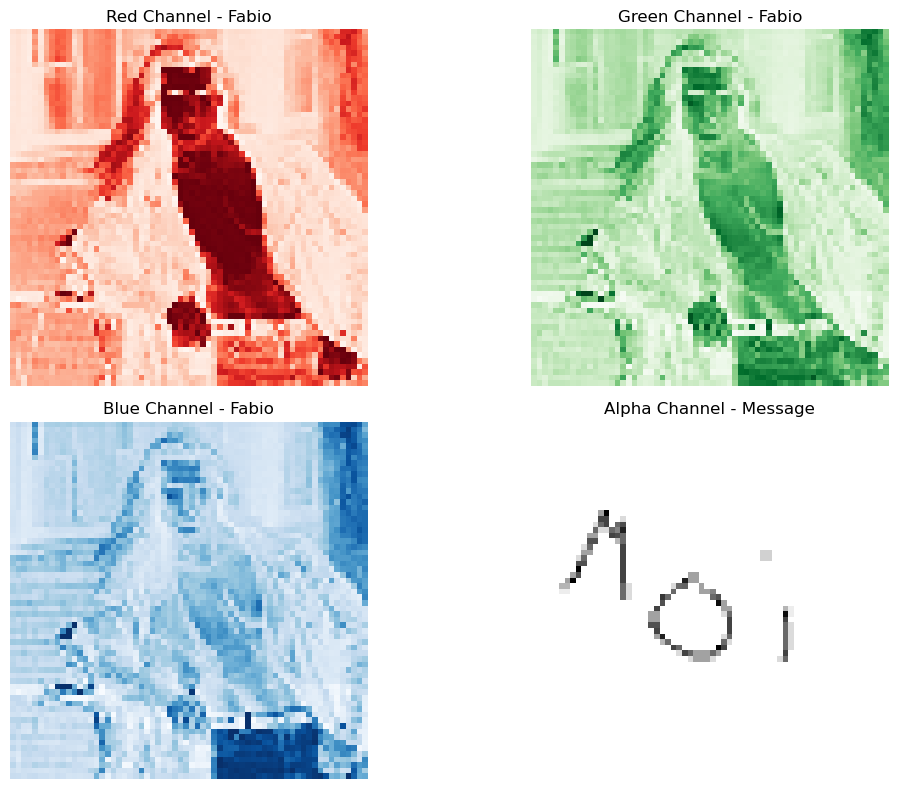

In [115]:
# Saving the different channels in their own variables
# Note: We want to add the alpha channel from our image containing the hidden message,
# so we save the alpha value from the message, not Fabio's alpha value.

red_ChannelFabio = fabio[:, :, 0]
green_ChannelFabio = fabio[:, :, 1]
blue_ChannelFabio = fabio[:, :, 2]

alpha_ChannelMessage = message[:, :, 3]

# Displaying the individual channels for visualization
plt.figure(figsize=(12, 8))

# Displaying the red channel of Fabio's image
plt.subplot(2, 2, 1)
plt.imshow(red_ChannelFabio, cmap='Reds')
plt.title("Red Channel - Fabio")
plt.axis('off')

# Displaying the green channel of Fabio's image
plt.subplot(2, 2, 2)
plt.imshow(green_ChannelFabio, cmap='Greens')
plt.title("Green Channel - Fabio")
plt.axis('off')

# Displaying the blue channel of Fabio's image
plt.subplot(2, 2, 3)
plt.imshow(blue_ChannelFabio, cmap='Blues')
plt.title("Blue Channel - Fabio")
plt.axis('off')

# Displaying the alpha channel of the message image
plt.subplot(2, 2, 4)
plt.imshow(alpha_ChannelMessage, cmap='gray')  # Using 'gray' colormap for alpha channel
plt.title("Alpha Channel - Message")
plt.axis('off')

plt.tight_layout()
plt.show()

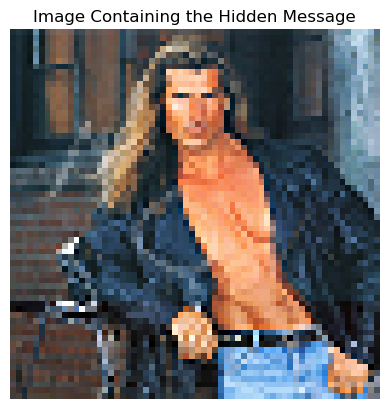

In [116]:
# Combining the red, green, and blue channels from "Fabio" with the alpha channel from "message"
# to create an image that contains the hidden message
steganography = np.stack((red_ChannelFabio, green_ChannelFabio, blue_ChannelFabio, alpha_ChannelMessage), axis=2)

# Displaying the steganography image
plt.title("Image Containing the Hidden Message")
plt.imshow(steganography)
plt.axis('off')  # Turn off axis labels for cleaner appearance
plt.show()

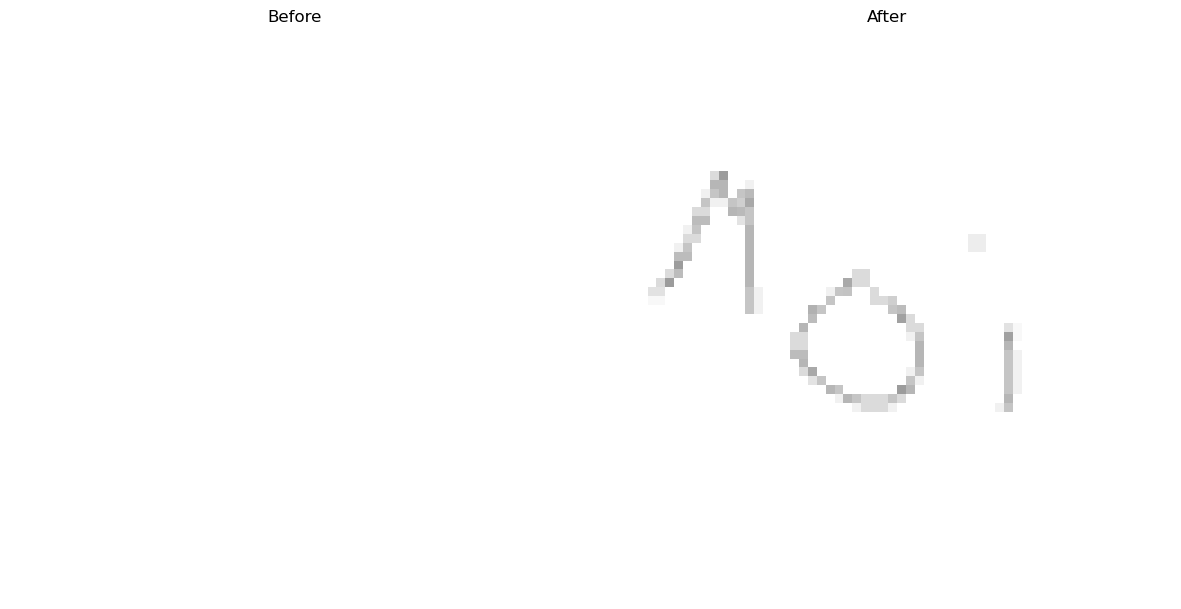

In [119]:
# Proving that the message is indeed in the image
theHiddenMessage = steganography[:, :, 3]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Using the alpha channel from Fabio's image
axs[0].imshow(fabio[:64, :64, 3], cmap="gray", vmin=0)
axs[0].set_title("Before")
axs[0].axis('off')  # Turn off axis labels for cleaner appearance

# Subplot 2: Using the alpha channel from the steganography image
axs[1].imshow(steganography[:64, :64, 3], cmap="gray", vmin=0)
axs[1].set_title("After")
axs[1].axis('off')  # Turn off axis labels for cleaner appearance

plt.tight_layout()
plt.show()

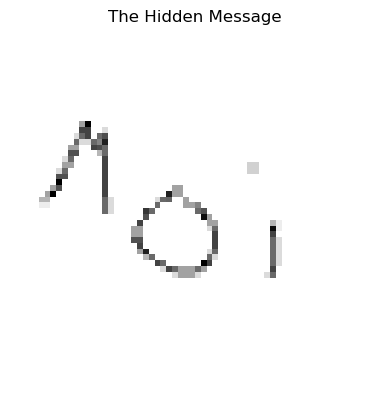

In [120]:
# Displaying the hidden message in its original format
plt.title("The Hidden Message")
plt.imshow(theHiddenMessage, cmap="gray")
plt.axis('off')  # Turn off axis labels for cleaner appearance
plt.show()

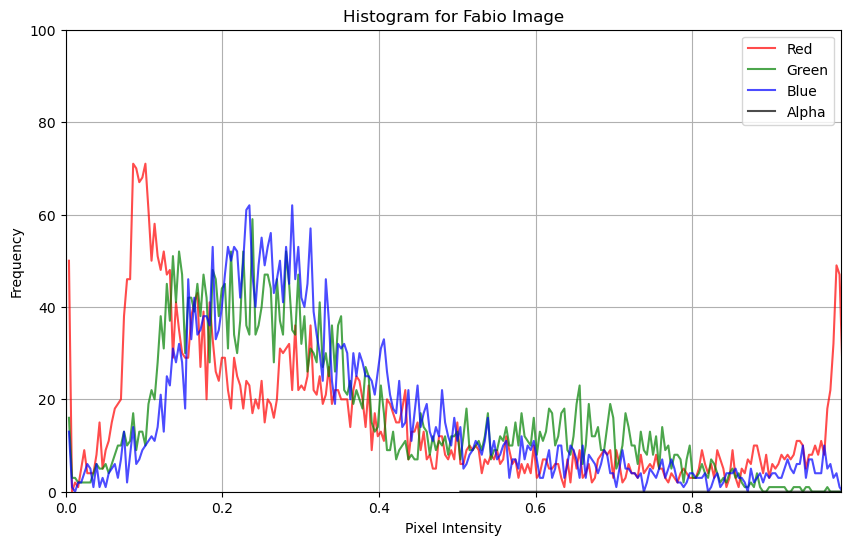

In [121]:
# Histogram for Fabio image
# Note: Alpha is defined as black

# Calculating histograms for different color channels
red_hist = np.histogram(fabio[:, :, 0], bins=256)
green_hist = np.histogram(fabio[:, :, 1], bins=256)
blue_hist = np.histogram(fabio[:, :, 2], bins=256)
alpha_hist = np.histogram(fabio[:, :, 3], bins=256)

# Plotting the histograms
plt.figure(figsize=(10, 6))

plt.plot(red_hist[1][1:], red_hist[0], color='red', label='Red', alpha=0.7)
plt.plot(green_hist[1][1:], green_hist[0], color='green', label='Green', alpha=0.7)
plt.plot(blue_hist[1][1:], blue_hist[0], color='blue', label='Blue', alpha=0.7)
plt.plot(alpha_hist[1][1:], alpha_hist[0], color='black', label='Alpha', alpha=0.7)

plt.title("Histogram for Fabio Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.ylim(0, 100)  # Adjusted ylim for better visualization
plt.xlim(0, 0.99)  # Adjusted xlim for better visualization

plt.grid(True)
plt.show()

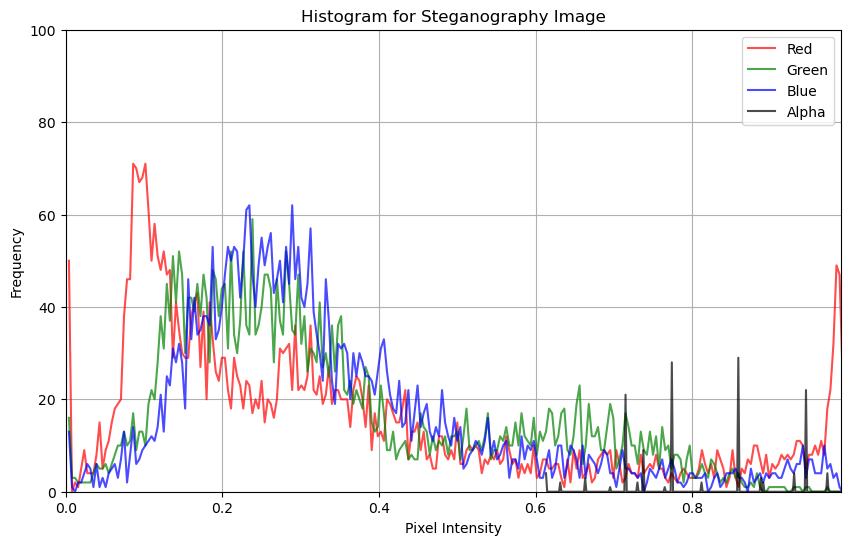

In [123]:
# Histogram for Steganography image
# Note: Alpha is defined as black

# Calculating histograms for different color channels
red_hist = np.histogram(steganography[:, :, 0], bins=256)
green_hist = np.histogram(steganography[:, :, 1], bins=256)
blue_hist = np.histogram(steganography[:, :, 2], bins=256)
alpha_hist = np.histogram(steganography[:, :, 3], bins=256)

# Plotting the histograms
plt.figure(figsize=(10, 6))

plt.plot(red_hist[1][1:], red_hist[0], color='red', label='Red', alpha=0.7)
plt.plot(green_hist[1][1:], green_hist[0], color='green', label='Green', alpha=0.7)
plt.plot(blue_hist[1][1:], blue_hist[0], color='blue', label='Blue', alpha=0.7)
plt.plot(alpha_hist[1][1:], alpha_hist[0], color='black', label='Alpha', alpha=0.7)

plt.title("Histogram for Steganography Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.ylim(0, 100)  # Adjusted ylim for better visualization
plt.xlim(0, 0.99)  # Adjusted xlim for better visualization

plt.grid(True)
plt.show()